In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\data science\Data scientist\Projects\Project 1\car_prices.csv")

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


# Data cleaning


In [5]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
df.shape

(558837, 16)

In [7]:
dfcopy = df.dropna()

In [8]:
dfcopy.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [9]:
dfcopy.shape

(472325, 16)

In [10]:
dfcopy.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [12]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [13]:
dfcopy.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [16]:
# we see an outlier in selling price
dfcopy = dfcopy.drop(dfcopy[dfcopy['sellingprice'] < 1000].index)

In [17]:
dfcopy.describe()

,year,condition,odometer,mmr,sellingprice
count,460781.000000,460781.000000,460781.000000,460781.000000,460781.000000
mean,2010.443375,31.239897,64285.213080,14150.742544,14018.734792
std,3.532332,13.014144,49013.464277,9438.228004,9503.508074
min,1990.000000,1.000000,1.000000,25.000000,1000.000000
25%,2008.000000,25.000000,27686.000000,7925.000000,7700.000000
50%,2012.000000,35.000000,49550.000000,12500.000000,12400.000000
75%,2013.000000,42.000000,93181.000000,18450.000000,18400.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Text(0.5, 1.0, 'Top 5 costliest cars sold brands')

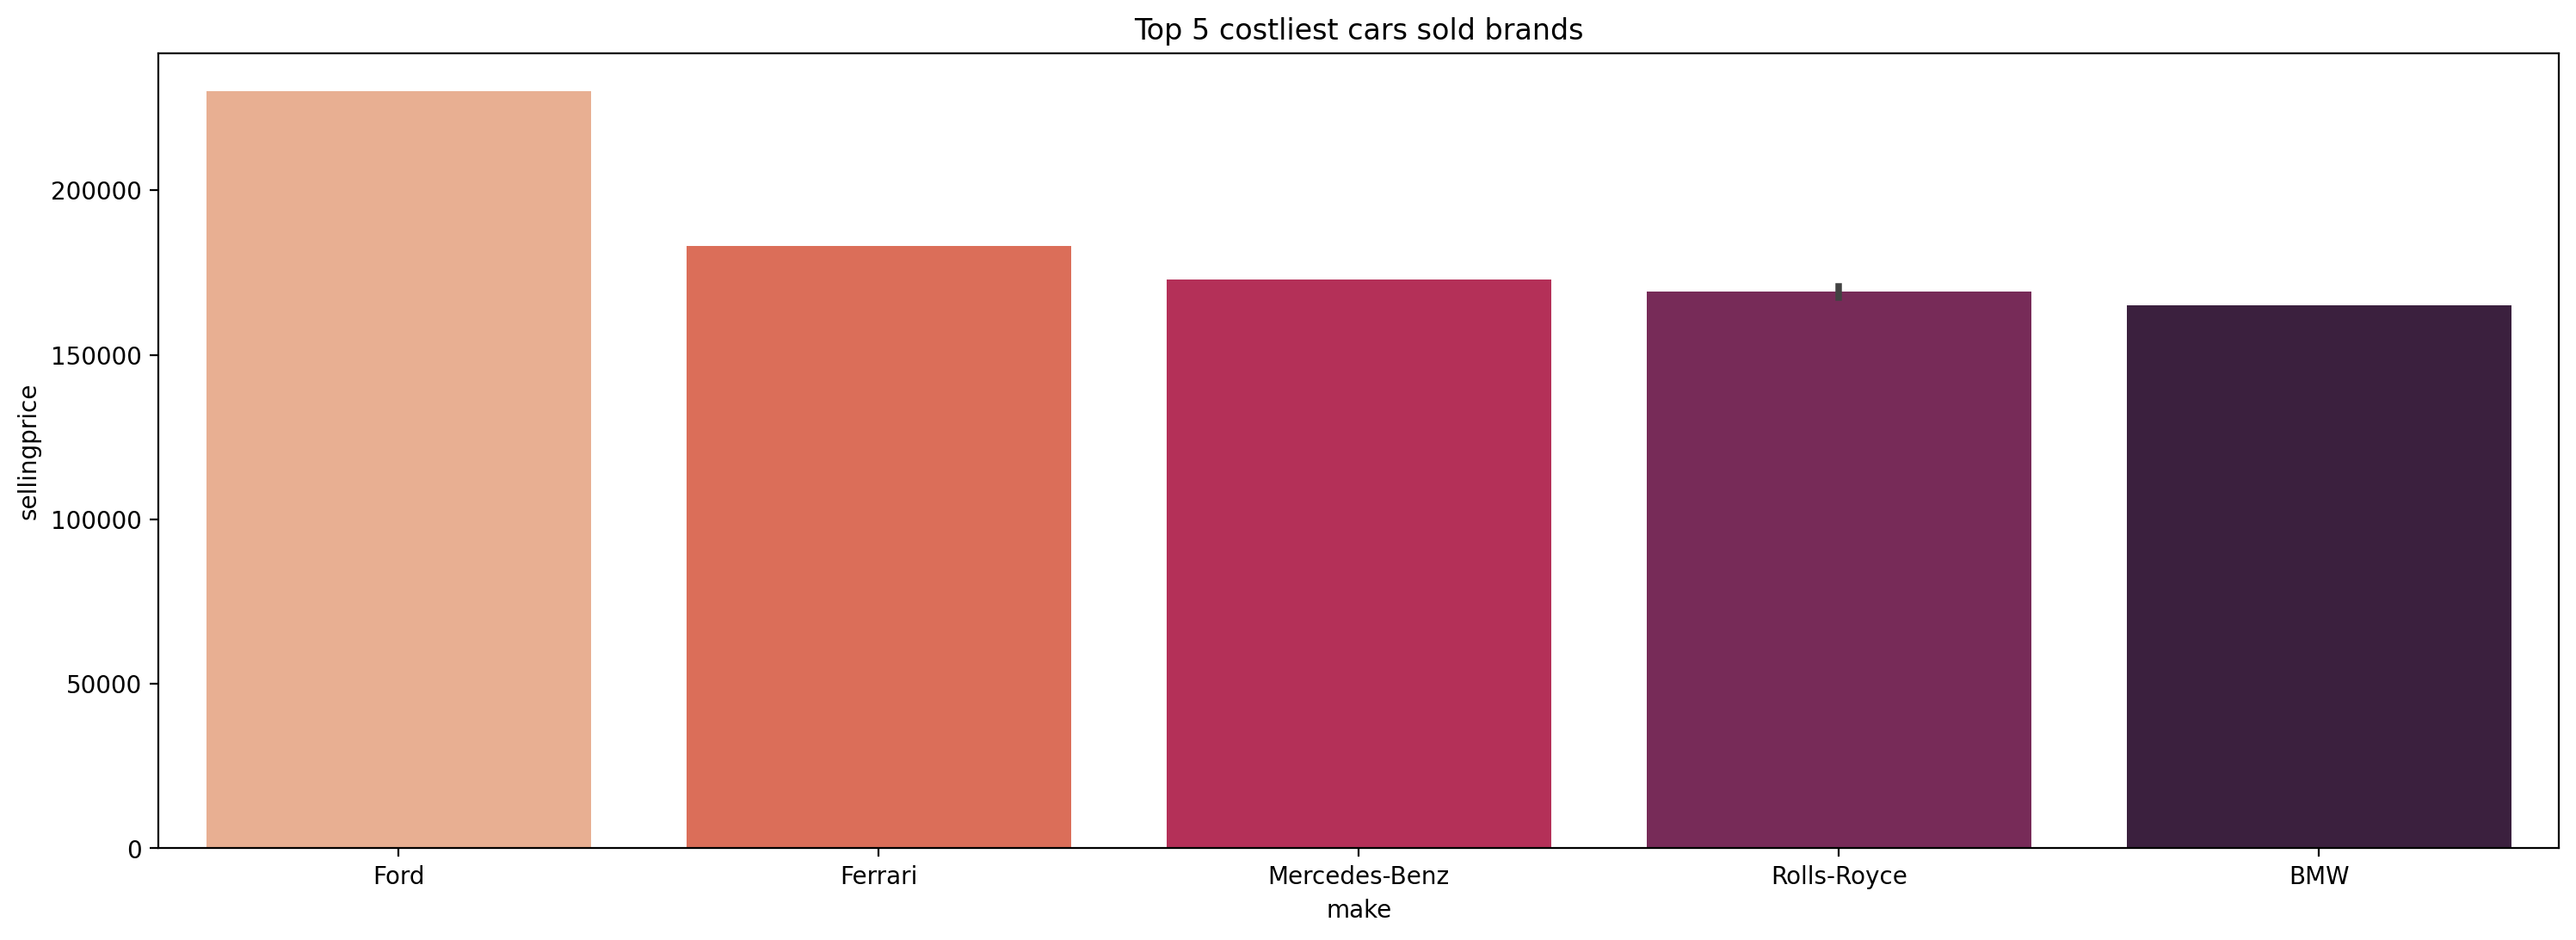

In [18]:

sortdata = dfcopy.sort_values(by='sellingprice',ascending=False)
top = sortdata.iloc[0:9]

plt.figure(figsize=(18,6),dpi = 200)
sns.barplot(data = top,x = 'make',y = 'sellingprice',palette='rocket_r')
plt.title("Top 5 costliest cars sold brands")


Text(0.5, 1.0, 'Average selling cost by state')

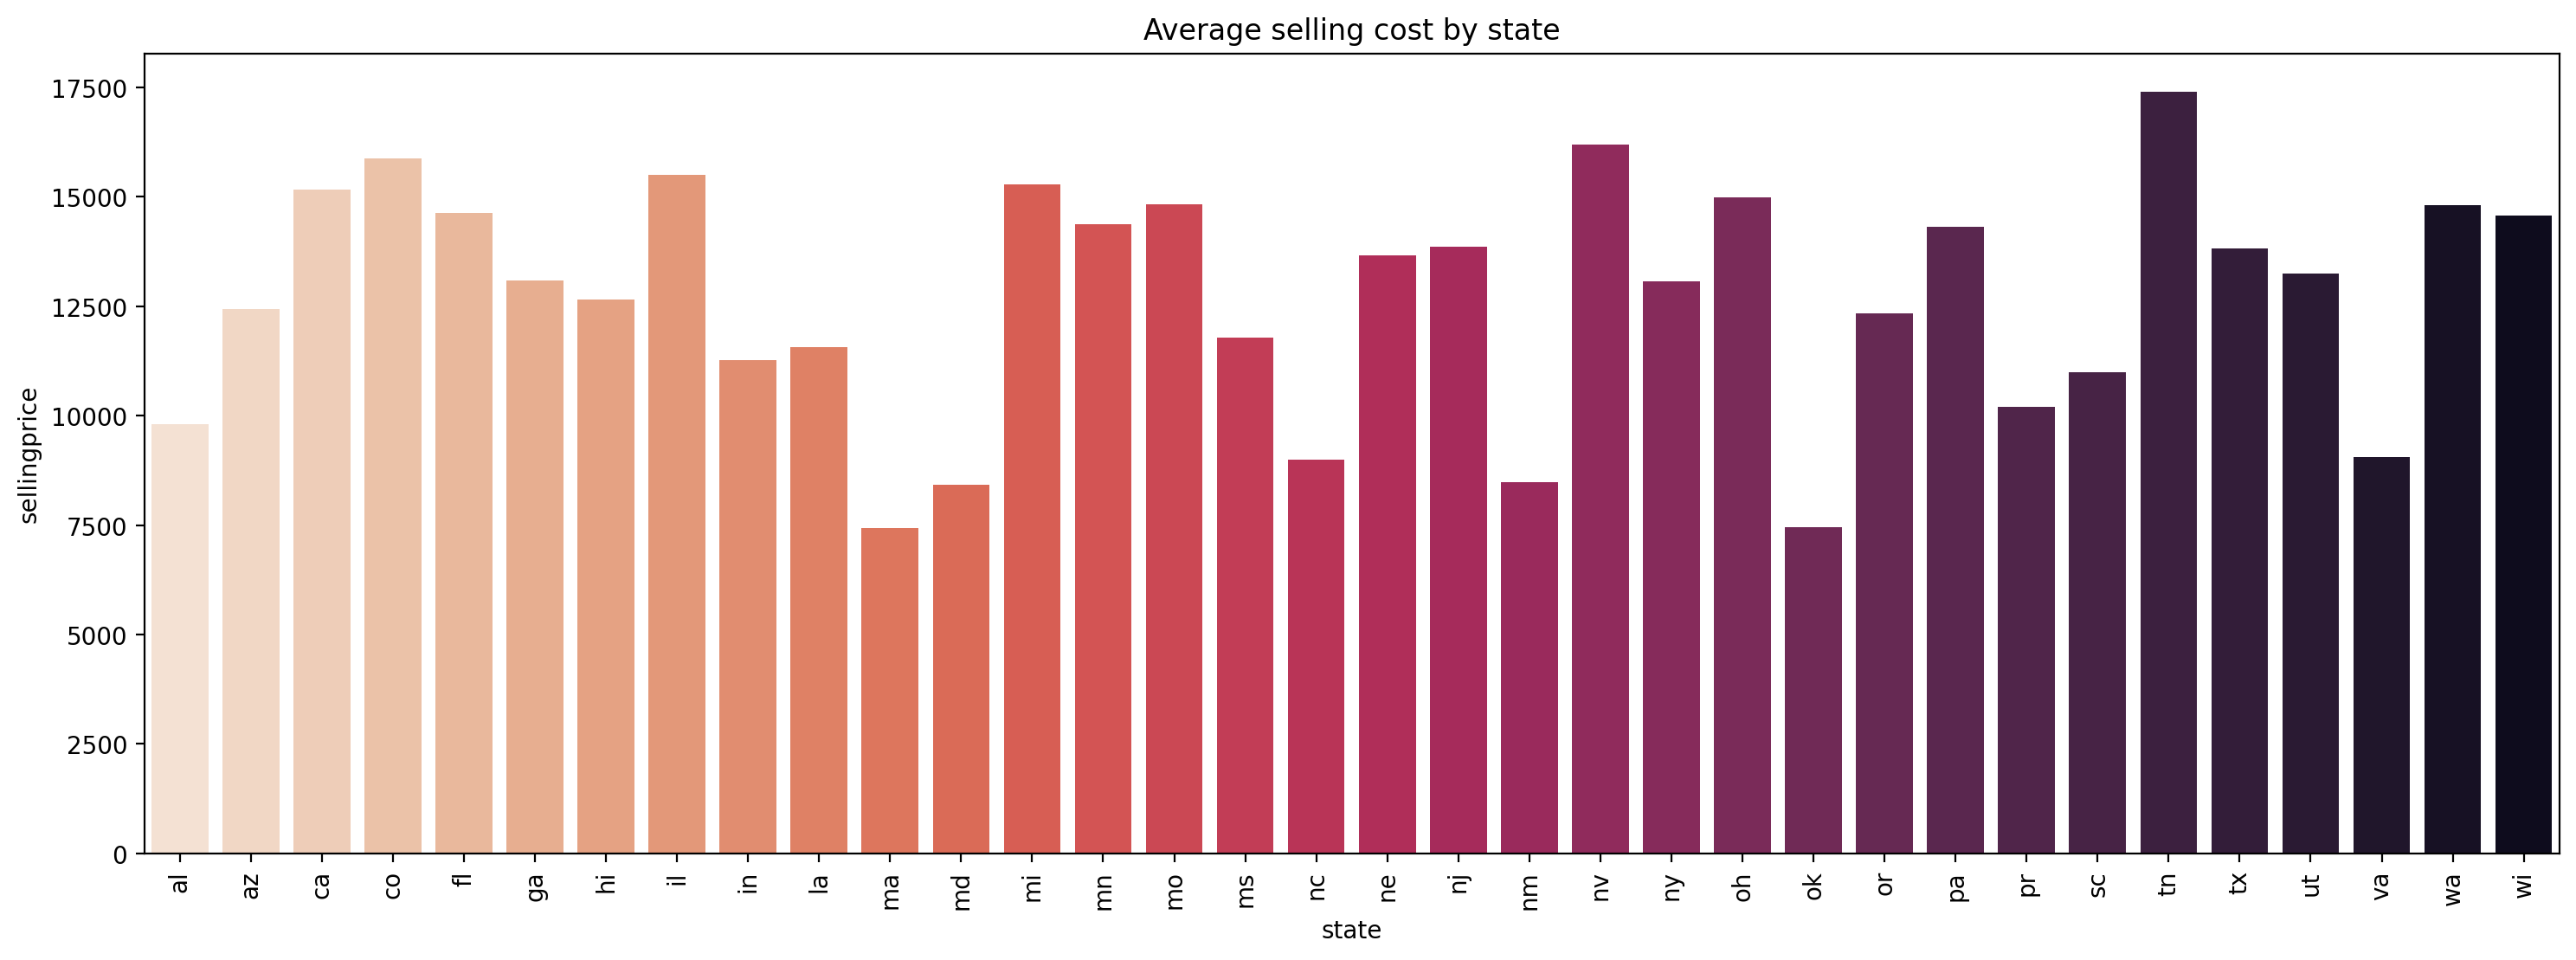

In [19]:
a = dfcopy.groupby('state')['sellingprice'].mean().reset_index()
plt.figure(figsize = (18,6),dpi = 200)
sns.barplot(data = a,x ='state',y = 'sellingprice',palette='rocket_r')
plt.xticks(rotation = 90);
plt.title("Average selling cost by state")

Text(0.5, 1.0, 'Average selling cost by state')

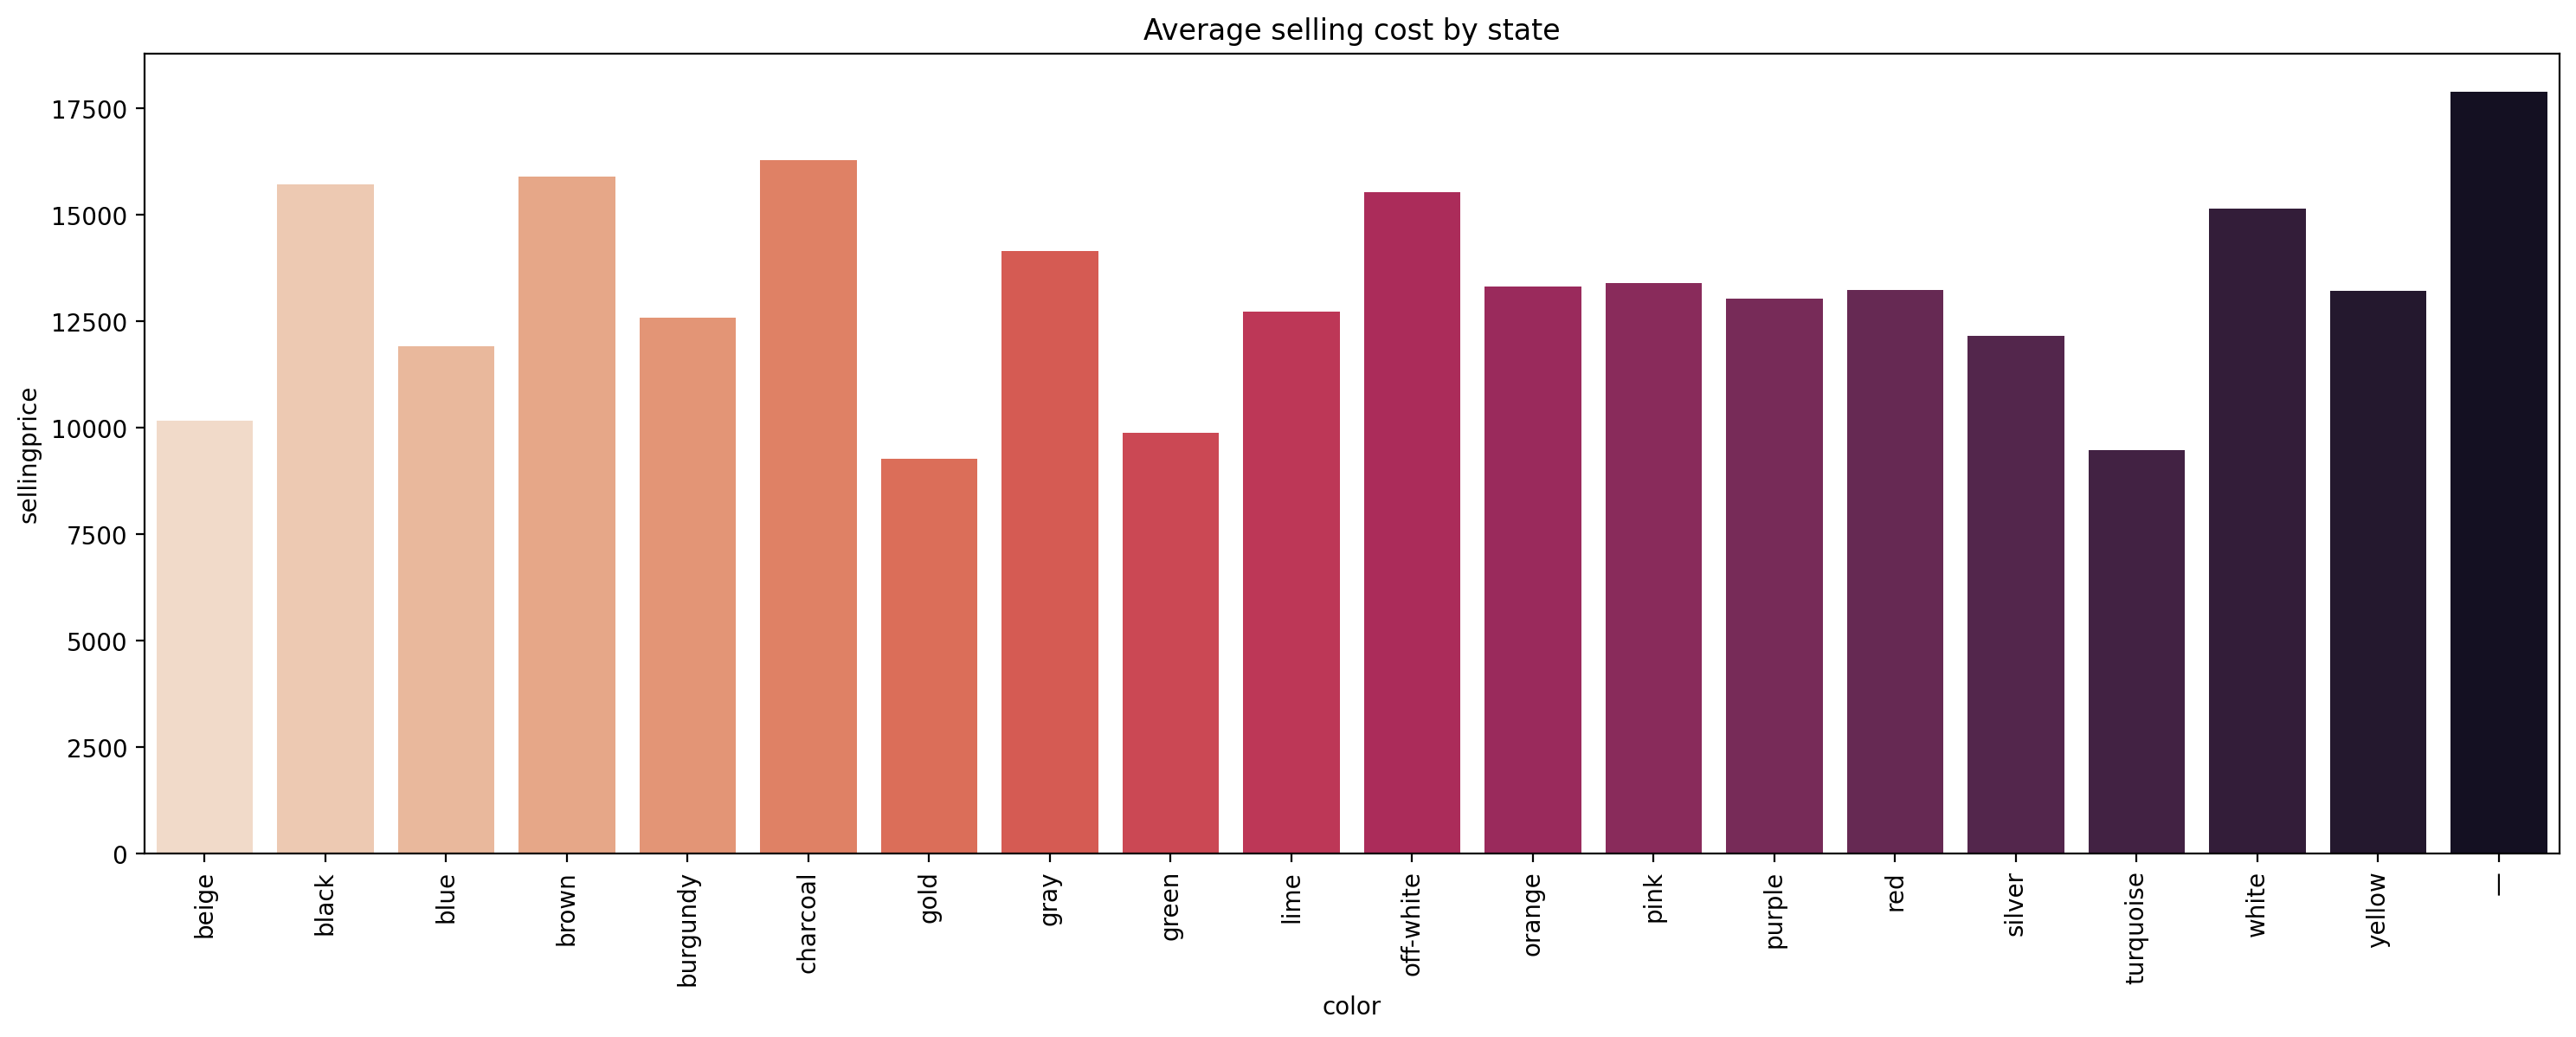

In [20]:
a = dfcopy.groupby('color')['sellingprice'].mean().reset_index()
plt.figure(figsize = (18,6),dpi = 200)

sns.barplot(data = a,x ='color',y = 'sellingprice',palette='rocket_r')
plt.xticks(rotation = 90);
plt.title("Average selling cost by state")

# Feature Engineering

In [33]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [22]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460781 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          460781 non-null  int64  
 1   make          460781 non-null  object 
 2   model         460781 non-null  object 
 3   trim          460781 non-null  object 
 4   body          460781 non-null  object 
 5   transmission  460781 non-null  object 
 6   vin           460781 non-null  object 
 7   state         460781 non-null  object 
 8   condition     460781 non-null  float64
 9   odometer      460781 non-null  float64
 10  color         460781 non-null  object 
 11  interior      460781 non-null  object 
 12  seller        460781 non-null  object 
 13  mmr           460781 non-null  float64
 14  sellingprice  460781 non-null  float64
 15  saledate      460781 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 59.8+ MB


In [23]:
label_encod = LabelEncoder()
columnsencod = ['make', 'model', 'trim', 'body', 'transmission', 'state',
                'color', 'interior']

for val in columnsencod:
    dfcopy[f'encode_{val}'] = label_encod.fit_transform(dfcopy[val])

    
dfcopy.drop(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller','saledate'],axis=1,inplace=True)

# Model building

In [ ]:
#Using RandomforestRegressor

In [70]:
X = dfcopy.drop('sellingprice',axis=1)
y = dfcopy['sellingprice']

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3, random_state=101)

In [71]:
model = RandomForestRegressor(n_estimators=5)

model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [72]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

In [73]:
mse

2720857.7733037216

In [74]:
rmse = np.sqrt(mse)
rmse

1649.5022804784846

In [88]:
row = X_test.iloc[0]
row_s = pd.DataFrame(row).transpose()
row_s


,year,condition,odometer,mmr,encode_make,encode_model,encode_trim,encode_body,encode_transmission,encode_state,encode_color,encode_interior
411878,2005.0,27.0,143131.0,16200.0,16.0,322.0,381.0,35.0,0.0,4.0,18.0,1.0


In [93]:
y_pred_real = model.predict(row_s)

print("Selling price predicted for the following model=",y_pred_real[0])

Selling price predicted for the following model= 14050.0


In [89]:
df.iloc[411878]

year                                               2005
make                                             HUMMER
model                                                H2
trim                                               Base
body                                                SUV
transmission                                  automatic
vin                                   5grgn23u65h130351
state                                                fl
condition                                          27.0
odometer                                       143131.0
color                                            yellow
interior                                          black
seller                  mid atlantic finance/clearwater
mmr                                             16200.0
sellingprice                                    13200.0
saledate        Thu Apr 30 2015 08:01:00 GMT-0700 (PDT)
Name: 411878, dtype: object

 ## Although the model is not that accurate it could find a good selling price prediction

### Predicted price  = 14050 Currency
### Test data price = 13200 Currency

In [94]:
import joblib



joblib.dump(model,'D:\data science\Data scientist\Projects\Project 1\Car_sales_pre_model.pkl')


['D:\\data science\\Data scientist\\Projects\\Project 1\\Car_sales_pre_model.pkl']